In [1]:
from to_merge import CustomAreaMap
import healpy as hp
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np

In [2]:
nside = 64
sky = CustomAreaMap(nside=nside, smc_radius=4, lmc_radius=6)
footprints_hp_array, labels = sky.return_maps()

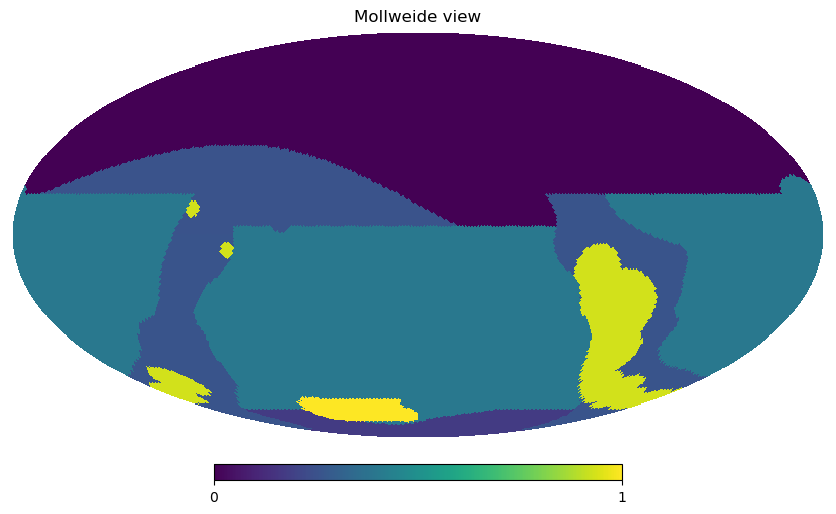

In [3]:
hp.mollview(footprints_hp_array['g'])

0 
1 LMC_SMC
2 bulgy
3 dusty_plane
4 euclid_overlap
5 lowdust
6 nes
7 scp
8 virgo


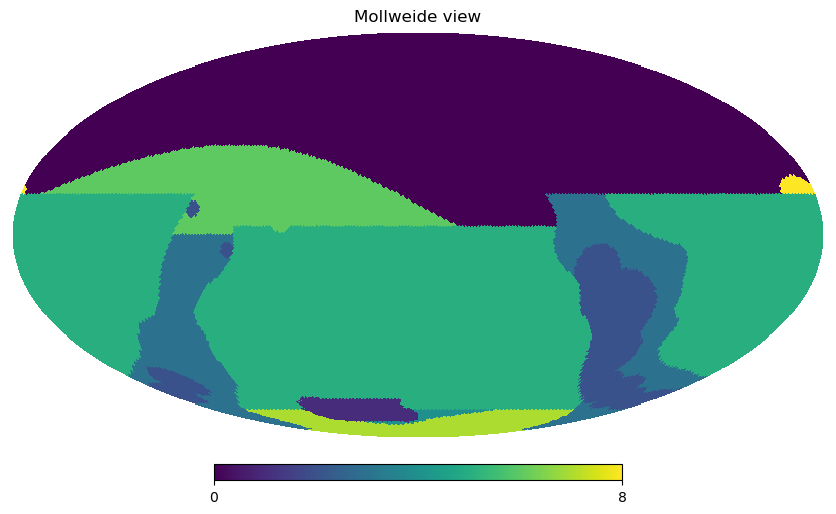

In [4]:
# Look at the labels
label_int = np.zeros(hp.nside2npix(nside))
for i,label in enumerate(np.unique(labels)):
    indx = np.where(labels == label)[0]
    label_int[indx] = i
    print(i, label)
hp.mollview(label_int)

In [5]:
ack, sm, lables = sky.estimate_visits(2.1e6)

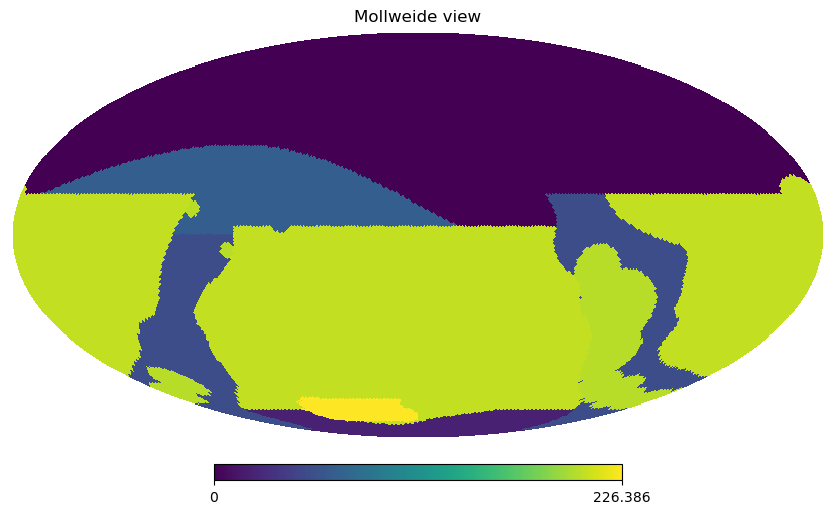

In [6]:


hp.mollview(ack['r'])

[  0.          27.78369826  53.50934479  67.91570685 201.68906884
 205.80517228]


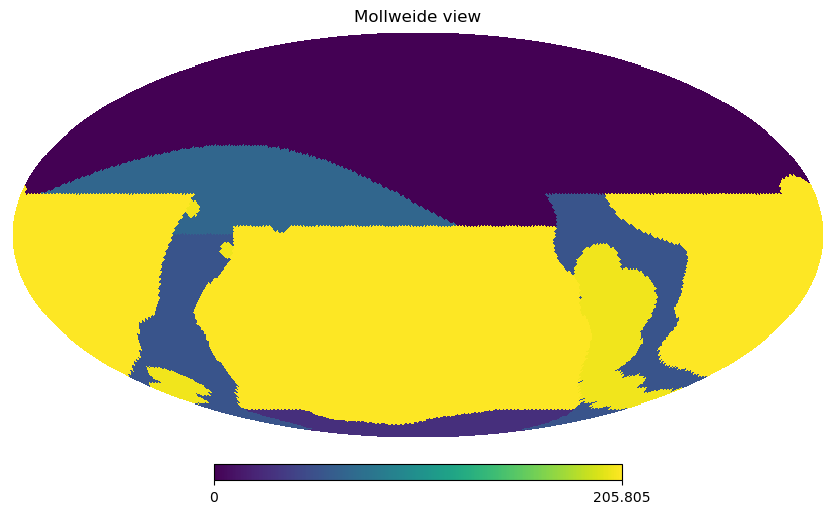

In [7]:
hp.mollview(ack['i'])
print(np.unique(ack['i']))

In [8]:
ack

array([( 0.        ,  0.        ,  0.        ,  0.        , 0.        , 0.       ),
       ( 0.        ,  0.        ,  0.        ,  0.        , 0.        , 0.       ),
       ( 0.        ,  0.        ,  0.        ,  0.        , 0.        , 0.       ),
       ...,
       (20.58051723, 36.01590515, 20.58051723, 27.78369826, 9.46703793, 9.6728431),
       (20.58051723, 36.01590515, 20.58051723, 27.78369826, 9.46703793, 9.6728431),
       (20.58051723, 36.01590515, 20.58051723, 27.78369826, 9.46703793, 9.6728431)],
      dtype=[('u', '<f8'), ('g', '<f8'), ('r', '<f8'), ('i', '<f8'), ('z', '<f8'), ('y', '<f8')])

 0.0
LMC_SMC 934.3554821635175
bulgy 864.3817235873951
dusty_plane 252.31714121860628
euclid_overlap 936.4135338863448
lowdust 936.4135338863448
nes 235.6469222637065
scp 124.100518886476
virgo 936.4135338863448
24020198.550327092


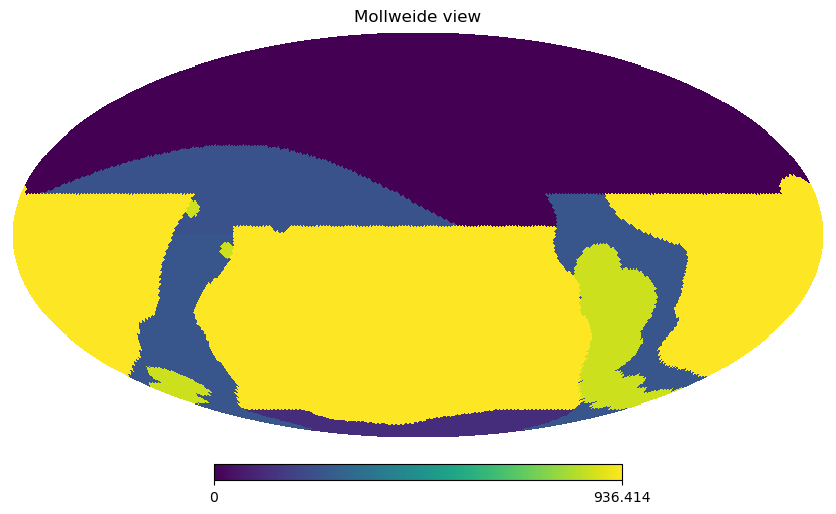

In [9]:
all_bands = 0
for key in ack.dtype.names:
    all_bands += ack[key]
hp.mollview(all_bands)

for lab in np.unique(labels):
    good = np.where(labels == lab)[0][0]
    print(lab, all_bands[good])

print(all_bands.sum())

In [10]:
good = np.where(all_bands > 0)
np.median(all_bands[good])

936.4135338863448

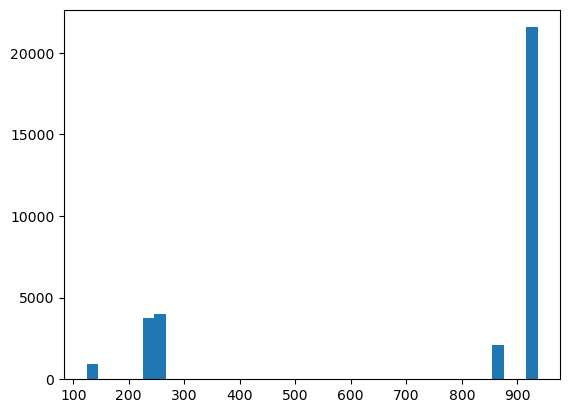

In [11]:
_temp = plt.hist(all_bands[good], bins=40)

In [12]:
print(lab, all_bands[good].max())

virgo 936.4135338863448


In [13]:
indx = np.where(labels == 'LMC_SMC')[0]
tots = 0
for filtername in 'ugrizy':
    print(filtername, np.unique(ack[filtername][indx]))
    tots += ack[filtername][indx][0]
tots

u [154.35387921]
g [205.80517228]
r [226.38568951]
i [205.80517228]
z [69.97375858]
y [72.0318103]


934.3554821635175

In [14]:
indx = np.where(labels == 'lowdust')[0]
tots = 0
for filtername in 'ugrizy':
    print(filtername, np.unique(ack[filtername][indx]))
    tots += ack[filtername][indx][0]
tots

u [72.0318103]
g [82.32206891]
r [205.80517228]
i [205.80517228]
z [185.22465505]
y [185.22465505]


936.4135338863448

In [15]:
928-854

74

In [16]:
np.size(np.where(labels == 'bulgy')[0])

2104